In [1]:
using BenchmarkTools, UnicodePlots, PythonPlot

In [2]:
sumsq(x,y) = x*x + y*y;

In [3]:
N = 10^8;
K = zero(Integer);

In [4]:
for i = 1:N
  if sumsq(rand(), rand()) < 1.0
    K += 1
  end
end

In [5]:
using Printf
@Printf.printf "Estimate of PI for %d trials is %8.5f\n" N 4.0*(K / N);

Estimate of PI for 100000000 trials is  3.14160


In [6]:
@time for i = 1:N
  if sumsq(rand(), rand()) < 1.0
    global K += 1
  end
end

 14.171770 seconds (378.53 M allocations: 7.131 GiB, 6.50% gc time)


In [7]:
while (true)
    N = 1000000
    K = zero(Integer)
    for i = 1:N
        if sumsq(rand(), rand()) < 1.0
          K += 1
        end
    end
    println(4.0*(K/N))
    break
end

3.141184


In [8]:
((rand()^2 + rand()^2) < 1.0 for i = 1:N)

Base.Generator{UnitRange{Int64}, var"#3#4"}(var"#3#4"(), 1:1000000)

In [2]:
N = 10^8; count((rand()^2 + rand()^2) < 1.0 for i = 1:N) * 4 / N

3.14167008

In [3]:
@time count((rand()^2 + rand()^2) < 1.0 for i = 1:N) * 4 / N

  0.788702 seconds (45.98 k allocations: 3.072 MiB, 1.46% gc time, 4.61% compilation time)


3.14172268

In [4]:
Sys.BINDIR

"/Applications/Julia-1.9.app/Contents/Resources/julia/bin"

In [5]:
function basel(N::Integer)
  @assert N > 0
  s = 0.0
  for i = 1:N
    s += 1.0/float(i)^2
  end
  return s
end

basel (generic function with 1 method)

In [6]:
basel(10^8) 

1.644934057834575

In [10]:
π*π/6

1.6449340668482264

In [8]:
using BenchmarkTools

In [9]:
@benchmark basel(10^8) samples=10

BenchmarkTools.Trial: 10 samples with 1 evaluation.
 Range (min … max):  382.208 ms … 391.341 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     384.630 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   384.986 ms ±   2.620 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▁    █    ▁     █▁ ▁            ▁                           ▁  
  █▁▁▁▁█▁▁▁▁█▁▁▁▁▁██▁█▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  382 ms           Histogram: frequency by time          391 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [11]:
using UnicodePlots

In [12]:
x = collect(1:100);
y = [x[i]*sin(0.3*x[i])*exp(-0.03*x[i]) for i = 1:length(x)];

In [13]:
myPlot = lineplot(x, y, title = "My Plot", name = "chp-01")

       ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀My Plot⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀       
       ┌────────────────────────────────────────┐       
    20 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ chp-01
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⡆⠀⠀⠀⠀⠀⠀⡎⢆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⡎⠀⢱⠀⠀⠀⠀⠀⢸⠀⠸⡀⠀⠀⠀⠀⠀⡔⠱⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
       │⠀⠀⡤⡀⠀⠀⠀⠀⢠⠃⠀⠘⡄⠀⠀⠀⠀⡎⠀⠀⡇⠀⠀⠀⠀⢠⠃⠀⢣⠀⠀⠀⠀⠀⡠⠊⢆⠀⠀⠀│       
       │⠀⡞⠀⢱⠀⠀⠀⠀⢸⠀⠀⠀⡇⠀⠀⠀⢀⠇⠀⠀⢱⠀⠀⠀⠀⡜⠀⠀⠸⡀⠀⠀⠀⢀⠇⠀⠘⡄⠀⠀│       
       │⠮⠤⠤⠤⡧⠤⠤⠤⡧⠤⠤⠤⢵⠤⠤⠤⢼⠤⠤⠤⠼⡤⠤⠤⢤⠧⠤⠤⠤⢧⠤⠤⠤⡼⠤⠤⠤⢼⡤⠤│       
       │⠀⠀⠀⠀⢸⠀⠀⢠⠇⠀⠀⠀⢸⠀⠀⠀⡎⠀⠀⠀⠀⡇⠀⠀⢸⠀⠀⠀⠀⢸⡀⠀⢠⠃⠀⠀⠀⠀⢇⠀│       
       │⠀⠀⠀⠀⠈⡆⠀⢸⠀⠀⠀⠀⠀⡇⠀⢀⡇⠀⠀⠀⠀⢱⠀⠀⡇⠀⠀⠀⠀⠀⢇⢀⡎⠀⠀⠀⠀⠀⠀⠓│       
       │⠀⠀⠀⠀⠀⢣⢀⠇⠀⠀⠀⠀⠀⢣⠀⢸⠀⠀⠀⠀⠀⠈⡆⢰⠃⠀⠀⠀⠀⠀⠈⠊⠀⠀⠀⠀⠀⠀⠀⠀│       
       │⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠀⠀⠘⡄⡇⠀⠀⠀⠀⠀⠀⠘⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
   -20 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
       └───────────────────────

In [14]:
using PythonPlot
plt = PythonPlot

PythonPlot

In [15]:
S0  = 100;      # Spot price
K   = 102;      # Strike price
r   = 0.05;     # Risk free rate
q   = 0.0;      # Dividend yield
v   = 0.2;      # Volatility
tma = 0.25;     # Time to maturity
T   = 90;       # Number of time steps

In [16]:
dt  = tma/T;
N = T + 1;
x = collect(0:T);

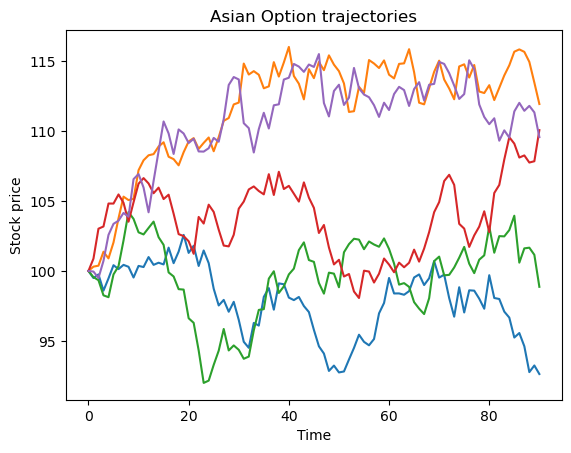

In [17]:
plt.title("Asian Option trajectories");
plt.xlabel("Time");
plt.ylabel("Stock price");

for k = 1:5
  S = zeros(Float64,N)
  S[1] = S0;
  dW = randn(N)*sqrt(dt);
  [ S[t] = S[t-1] * (1 + (r - q - 0.5*v*v)*dt + v*dW[t] + 0.5*v*v*dW[t]*dW[t]) for t=2:N ]
  plt.plot(x,S)
end